<a href="https://colab.research.google.com/github/fenzhantw/DLforeveryone/blob/main/RNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential, Model

print(tf.__version__)

2.8.0


In [2]:
# One hot encoding for each char in 'hello'
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

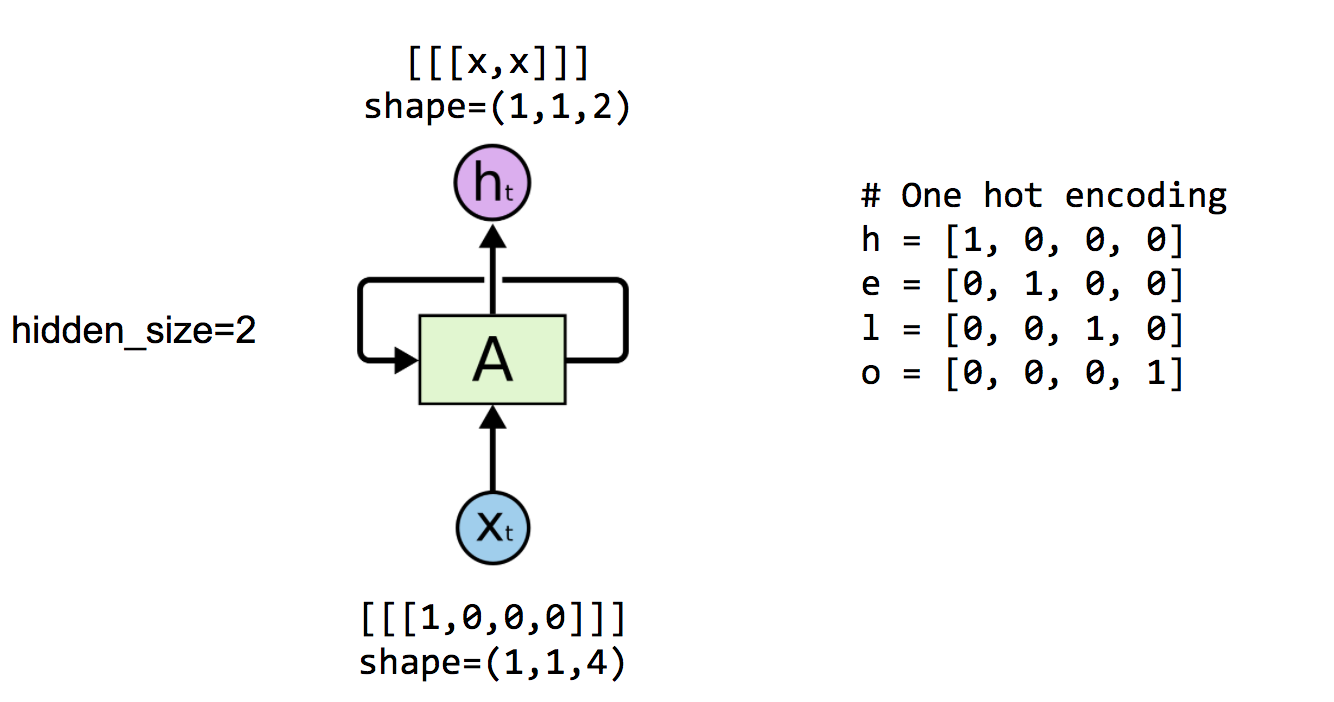

In [3]:
# One cell RNN input_dim (4) -> output_dim (2)
x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2
cell = layers.SimpleRNNCell(units=hidden_size) # creating SimpleRNNCell
rnn = layers.RNN(cell, return_sequences=True, return_state=True) # analogous to tf.nn.dynamic_rnn
outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[ 0.04389824 -0.6987829 ]]], shape: (1, 1, 2)
states: [[ 0.04389824 -0.6987829 ]], shape: (1, 2)


In [4]:
# equivalent to above case
rnn = layers.SimpleRNN(units=hidden_size, return_sequences=True,
                       return_state=True) # layers.SimpleRNNCell + layers.RNN

outputs, states = rnn(x_data)

print('x_data: {}, shape: {}'.format(x_data, x_data.shape))
print('outputs: {}, shape: {}'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]]], shape: (1, 1, 4)
outputs: [[[-0.2233652 -0.719992 ]]], shape: (1, 1, 2)
states: [[-0.2233652 -0.719992 ]], shape: (1, 2)


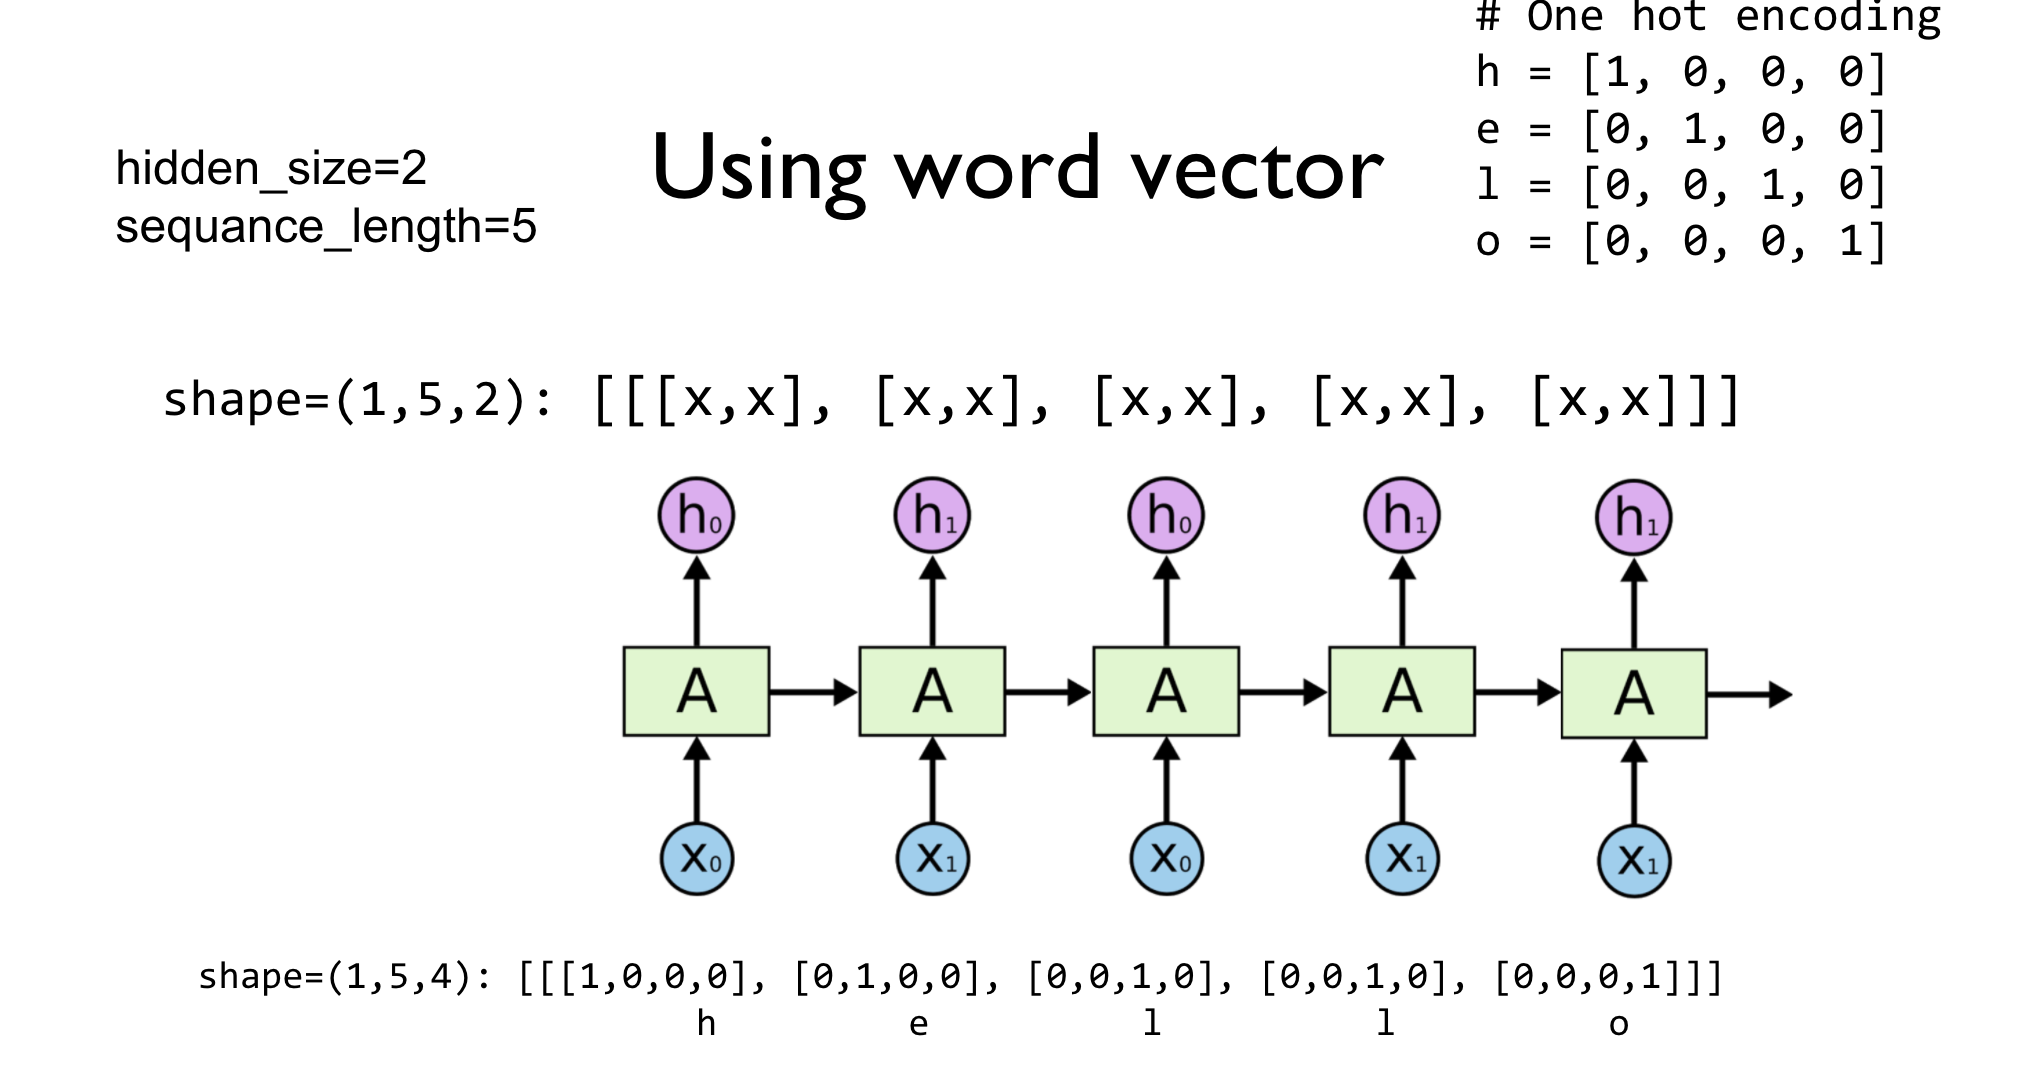

In [5]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.35128218 -0.7461349 ]
  [ 0.9456106   0.24346325]
  [ 0.23748656  0.6718196 ]
  [-0.02275729  0.02996877]
  [-0.68163455  0.4484034 ]]], shape: (1, 5, 2) 

states: [[-0.68163455  0.4484034 ]], shape: (1, 2)


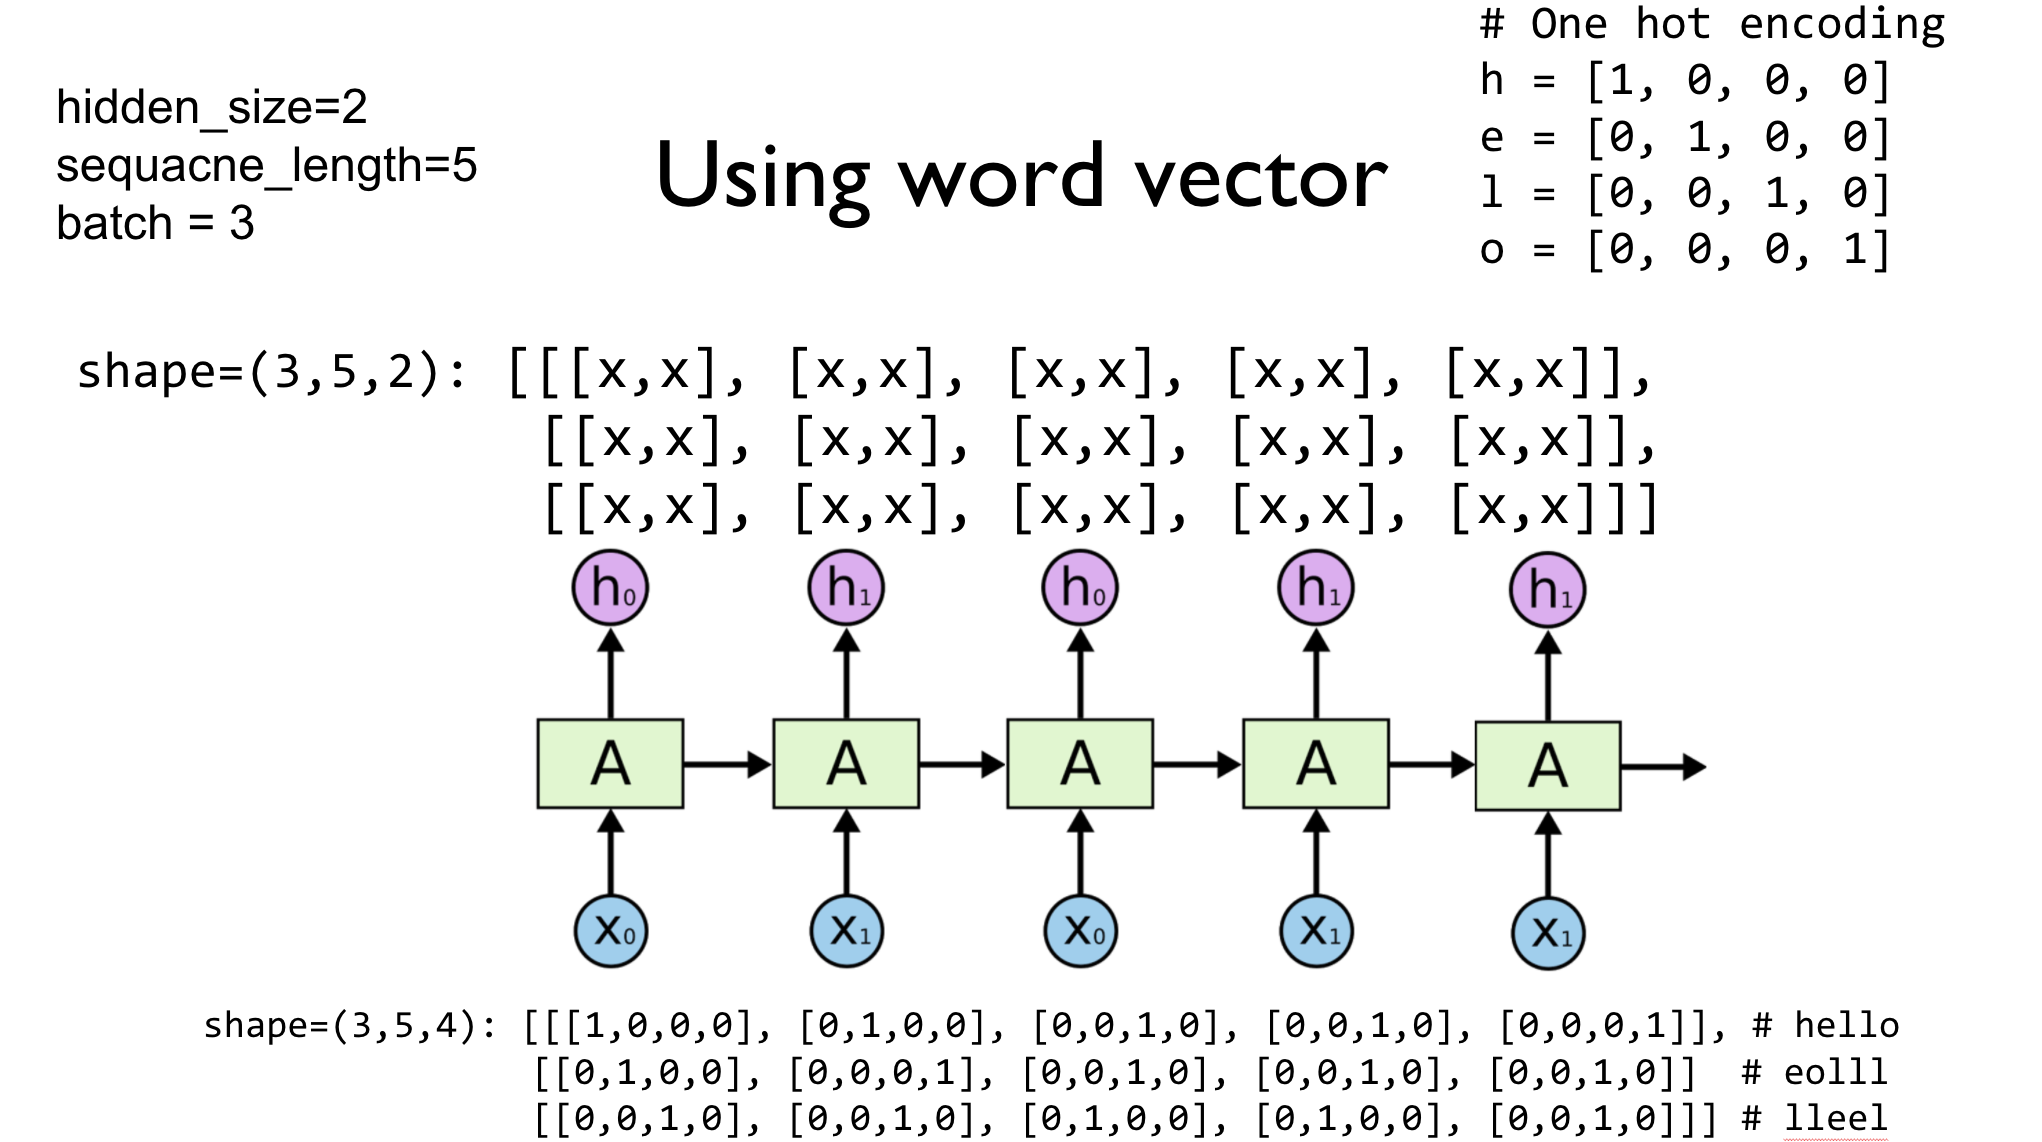

In [6]:
# One cell RNN input_dim (4) -> output_dim (2). sequence: 5, batch 3
# 3 batches 'hello', 'eolll', 'lleel'
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = layers.SimpleRNN(units=2, return_sequences=True, return_state=True)    
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.652963    0.46345693]
  [ 0.18402843 -0.8384372 ]
  [ 0.8306639   0.8387271 ]
  [ 0.896989   -0.5085701 ]
  [ 0.4878988   0.81631136]]

 [[ 0.7279213  -0.71899813]
  [ 0.3919094   0.88269186]
  [ 0.7693703  -0.4685957 ]
  [ 0.9330104   0.6221784 ]
  [ 0.922208   -0.35547706]]

 [[ 0.6795452   0.41243094]
  [ 0.88574564 -0.11137448]
  [ 0.9481413  -0.75716406]
  [ 0.96503323 -0.3564231 ]
  [ 0.9515312   0.5201189 ]]], shape: (3, 5, 2) 

states: [[ 0.4878988   0.81631136]
 [ 0.922208   -0.35547706]
 [ 0.9515312   0.5201189 ]], shape: (3, 2)
